# What is the relationship between drug seizure rates, country economic income classes, and temporal trends over multiple years?

In [81]:
import pandas as pd
import matplotlib.pyplot as plt
import scipy.stats as st
import numpy as np
from scipy.stats import linregress
from pprint import pprint

#importing csv data variables
international_drug_seizures_path = "seizures_1.csv"
world_data_path = "worlddata.csv"

drug_seizures = pd.read_csv(international_drug_seizures_path)
world_data = pd.read_csv(world_data_path)

#merge datasets

world_data = pd.merge(drug_seizures, world_data, how = 'outer', on ='country')

world_data

,Region,country,ISO Code,Drug Group,Drug,Year,KG Equivalent,electricity_access,gdp,gdp_capita,labor_rate,labor_force,land_area,life_expectancy,adult_literacy,water_access,air_pollution,population_density,population,alcohol_consumption,unemployment_rate,social_support,freedom,generosity,income_class,cpi
0,Africa,Algeria,DZA,Cannabis-type,Marijuana (herb),1970.0,141.0,99.49,1.677553e+11,4117.84,41.79,1.197921e+07,2381741.0,75.79,81.41,93.73,100.00,17.10,4.073651e+07,0.5844,10.540,0.785,0.510,-0.182,Lower middle income,34.5
1,Africa,Algeria,DZA,Cannabis-type,Hashish (resin),1970.0,140.0,99.49,1.677553e+11,4117.84,41.79,1.197921e+07,2381741.0,75.79,81.41,93.73,100.00,17.10,4.073651e+07,0.5844,10.540,0.785,0.510,-0.182,Lower middle income,34.5
2,Africa,Algeria,DZA,Cannabis-type,Marijuana (herb),1980.0,240.0,99.49,1.677553e+11,4117.84,41.79,1.197921e+07,2381741.0,75.79,81.41,93.73,100.00,17.10,4.073651e+07,0.5844,10.540,0.785,0.510,-0.182,Lower middle income,34.5
3,Africa,Algeria,DZA,Opioids,Heroin,1981.0,0.4,99.49,1.677553e+11,4117.84,41.79,1.197921e+07,2381741.0,75.79,81.41,93.73,100.00,17.10,4.073651e+07,0.5844,10.540,0.785,0.510,-0.182,Lower middle income,34.5
4,Africa,Algeria,DZA,Cannabis-type,Marijuana (herb),1981.0,14.0,99.49,1.677553e+11,4117.84,41.79,1.197921e+07,2381741.0,75.79,81.41,93.73,100.00,17.10,4.073651e+07,0.5844,10.540,0.785,0.510,-0.182,Lower middle income,34.5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
51223,NaN,Tanzania,NaN,NaN,NaN,NaN,NaN,31.51,5.185807e+10,964.88,83.91,2.570046e+07,885800.0,65.64,77.89,53.00,100.00,62.46,5.532552e+07,11.6454,2.167,0.702,0.785,0.138,Lower middle income,33.5
51224,NaN,Timor-Leste,NaN,NaN,NaN,NaN,NaN,77.12,1.601170e+09,1298.28,67.27,5.132608e+05,14870.0,67.59,68.07,77.51,100.00,82.98,1.233864e+06,0.4733,4.645,NaN,NaN,NaN,Lower middle income,34.0
51225,NaN,United States,NaN,NaN,NaN,NaN,NaN,100.00,1.922788e+13,59340.13,62.24,1.630930e+08,9147420.0,78.60,NaN,99.55,5.05,35.41,3.239428e+08,9.4859,4.603,0.906,0.825,0.161,High income,74.0
51226,NaN,Venezuela,NaN,NaN,NaN,NaN,NaN,99.62,NaN,NaN,60.58,1.321089e+07,882050.0,72.25,96.87,94.31,99.95,34.48,3.041507e+07,6.0500,5.367,0.899,0.554,-0.190,Lower middle income,17.5


In [82]:
#Hypothesis: Countries with lower income classes will have a higher rate of drug seizures.
#created a DataFrame of drug siezures by year and weight

yearly_mean = drug_seizures['KG Equivalent'].groupby(drug_seizures['Year']).mean()
yearly_median = drug_seizures['KG Equivalent'].groupby(drug_seizures['Year']).median()
yearly_var = drug_seizures['KG Equivalent'].groupby(drug_seizures['Year']).var()
yearly_std = drug_seizures['KG Equivalent'].groupby(drug_seizures['Year']).std()
yearly_sem = drug_seizures['KG Equivalent'].groupby(drug_seizures['Year']).sem()

yearly_summary = pd.DataFrame({'Yearly Mean' : yearly_mean, 'Yearly Median' : yearly_median, 'Yearly Variance': yearly_var, 'Yearly Std. Dev.' : yearly_std, 'Yearly Std. Err' : yearly_sem })

yearly_summary

,Yearly Mean,Yearly Median,Yearly Variance,Yearly Std. Dev.,Yearly Std. Err
Year,,,,,
1970,1199.597605,73.000000,1.117103e+07,3.342308e+03,643.227554
1971,60.353074,2.056148,1.386919e+04,1.177675e+02,58.883768
1972,118.500000,118.500000,2.668050e+04,1.633417e+02,115.500000
1973,101.909189,32.000000,1.762164e+04,1.327465e+02,76.641235
1974,79.570219,39.740438,1.165770e+04,1.079708e+02,53.985406
1975,79.325122,24.100244,1.628612e+04,1.276171e+02,63.808540
1976,87.451673,17.000000,1.856301e+04,1.362461e+02,60.931122
1977,119.563216,2.150000,7.000246e+04,2.645798e+02,108.014240
1978,85.615981,2.500000,3.708416e+04,1.925725e+02,78.617384


In [83]:
#displaying all the income types
all_income_classes = world_data['income_class'].unique()

all_income_classes

array(['Lower middle income', 'Upper middle income', 'High income', nan,
       'Low income'], dtype=object)

In [84]:
#group income class by country

income_class_per_country = world_data.groupby('country')['income_class'].unique()

income_class_per_country


country
Afghanistan             [Low income]
Albania        [Upper middle income]
Algeria        [Lower middle income]
Andorra                        [nan]
Angola         [Lower middle income]
                       ...          
Viet Nam                       [nan]
Vietnam        [Lower middle income]
Yemen                   [Low income]
Zambia         [Lower middle income]
Zimbabwe       [Lower middle income]
Name: income_class, Length: 240, dtype: object

In [85]:
#group average drug seizures by country

drug_seizures_per_country = world_data.groupby('country')['KG Equivalent'].mean()

drug_seizures_per_country

country
Afghanistan    27600.887575
Albania         5919.982247
Algeria         5563.786745
Andorra            1.097652
Angola           766.466967
                   ...     
Viet Nam         588.626318
Vietnam                 NaN
Yemen            748.908092
Zambia          5257.383867
Zimbabwe        1005.650580
Name: KG Equivalent, Length: 240, dtype: float64

In [87]:
drug_seizures_per_income = world_data.groupby('income_class')['KG Equivalent'].mean()

drug_seizures_per_income

income_class
High income             2411.035280
Low income             12052.033199
Lower middle income    75952.920507
Upper middle income    73417.449240
Name: KG Equivalent, dtype: float64

In [90]:
# Create a pivot table to show yearly drug seizures by country and income class
yearly_drug_seizures = world_data.pivot_table(
    values='KG Equivalent',
    index='Year',
    columns=['country', 'income_class'],
    aggfunc='sum'
)

# Display the resulting DataFrame
yearly_drug_seizures


country,Afghanistan,Albania,Algeria,Angola,Argentina,Armenia,Australia,Austria,Azerbaijan,Bahrain,Bangladesh,Barbados,Belarus,Belgium,Belize,Benin,Bhutan,Bosnia and Herzegovina,Botswana,Brazil,Brunei Darussalam,Bulgaria,Burkina Faso,Burundi,Cabo Verde,Cambodia,Cameroon,Canada,Central African Republic,Chad,Chile,China,Colombia,Comoros,Costa Rica,Croatia,Cuba,Cyprus,Czechia,Denmark,...,Philippines,Poland,Portugal,Puerto Rico,Qatar,Romania,Rwanda,Saudi Arabia,Senegal,Serbia,Seychelles,Sierra Leone,Singapore,Slovenia,Somalia,South Africa,Spain,Sri Lanka,Sudan,Suriname,Sweden,Switzerland,Tajikistan,Thailand,Togo,Tonga,Trinidad and Tobago,Tunisia,Turkey,Turkmenistan,Uganda,Ukraine,United Arab Emirates,United Kingdom,Uruguay,Uzbekistan,Vanuatu,Yemen,Zambia,Zimbabwe
income_class,Low income,Upper middle income,Lower middle income,Lower middle income,Upper middle income,Upper middle income,High income,High income,Upper middle income,High income,Lower middle income,High income,Upper middle income,High income,Upper middle income,Lower middle income,Lower middle income,Upper middle income,Upper middle income,Upper middle income,High income,Upper middle income,Low income,Low income,Lower middle income,Lower middle income,Lower middle income,High income,Low income,Low income,High income,Upper middle income,Upper middle income,Lower middle income,Upper middle income,High income,Upper middle income,High income,High income,High income,...,Lower middle income,High income,High income,High income,High income,High income,Low income,High income,Lower middle income,Upper middle income,High income,Low income,High income,High income,Low income,Upper middle income,High income,Lower middle income,Low income,Upper middle income,High income,High income,Lower middle income,Upper middle income,Low income,Upper middle income,High income,Lower middle income,Upper middle income,Upper middle income,Low income,Lower middle income,High income,High income,High income,Lower middle income,Lower middle income,Low income,Lower middle income,Lower middle income
Year,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1970.0,NaN,NaN,281.000000,NaN,13482.000000,NaN,119.000000,29.000000,NaN,99.000000,NaN,NaN,NaN,33.000000,NaN,NaN,NaN,NaN,29.000000,NaN,NaN,1375.000000,NaN,NaN,NaN,NaN,310.000000,368.000000,NaN,NaN,111.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,674.000000,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,328.135330,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1971.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,241.412297,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1972.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,237.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1973.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,305.727566,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1974.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,318.280876,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1975.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,

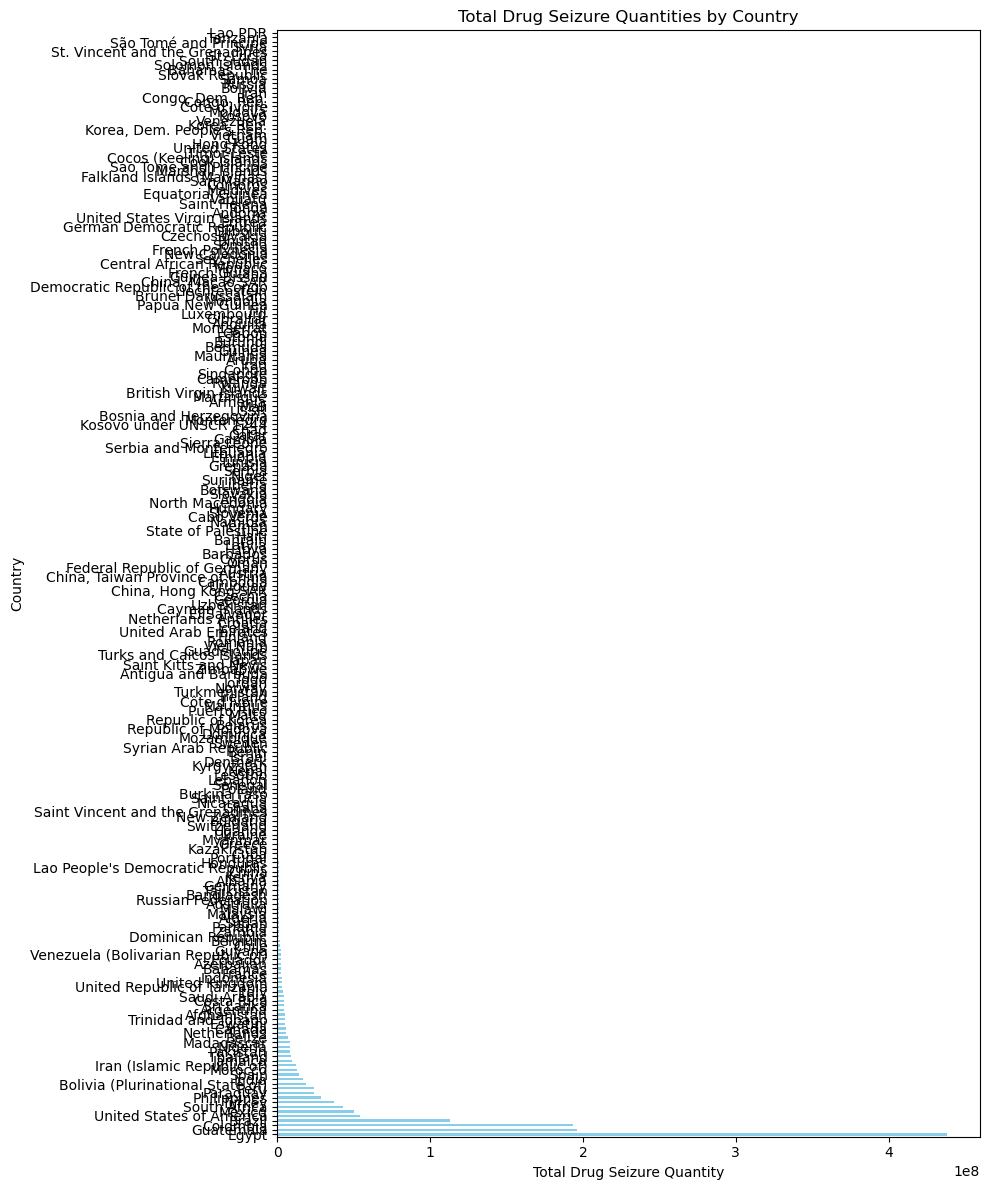

In [93]:
# plotting a horizontal bar chart
plt.figure(figsize=(10, 12))

seizures_by_country = seizures_by_country.sort_values(ascending=False)

seizures_by_country.plot(kind='barh', color='skyblue')
plt.xlabel('Total Drug Seizure Quantity')
plt.ylabel('Country')
plt.title('Total Drug Seizure Quantities by Country')
plt.tight_layout()
plt.show()


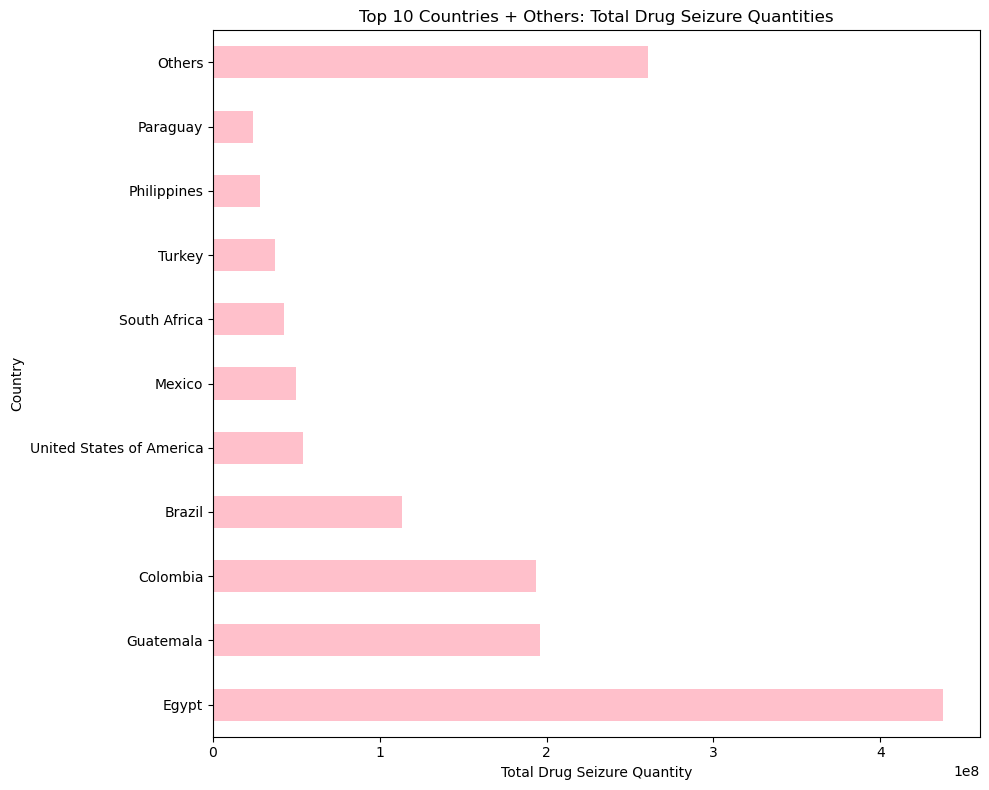

In [68]:
# narrowed it down by the top 10 countries

N = 10 
top_countries = seizures_by_country.nlargest(N)

# made a group of smaller values into 'Others'
other_countries_sum = seizures_by_country[~seizures_by_country.index.isin(top_countries.index)].sum()
top_countries['Others'] = other_countries_sum

# plotting a horizontal bar chart for top countries and 'Others'
plt.figure(figsize=(10, 8))
top_countries.plot(kind='barh', color='pink')
plt.xlabel('Total Drug Seizure Quantity')
plt.ylabel('Country')
plt.title(f'Top {N} Countries + Others: Total Drug Seizure Quantities')
plt.tight_layout()
plt.show()


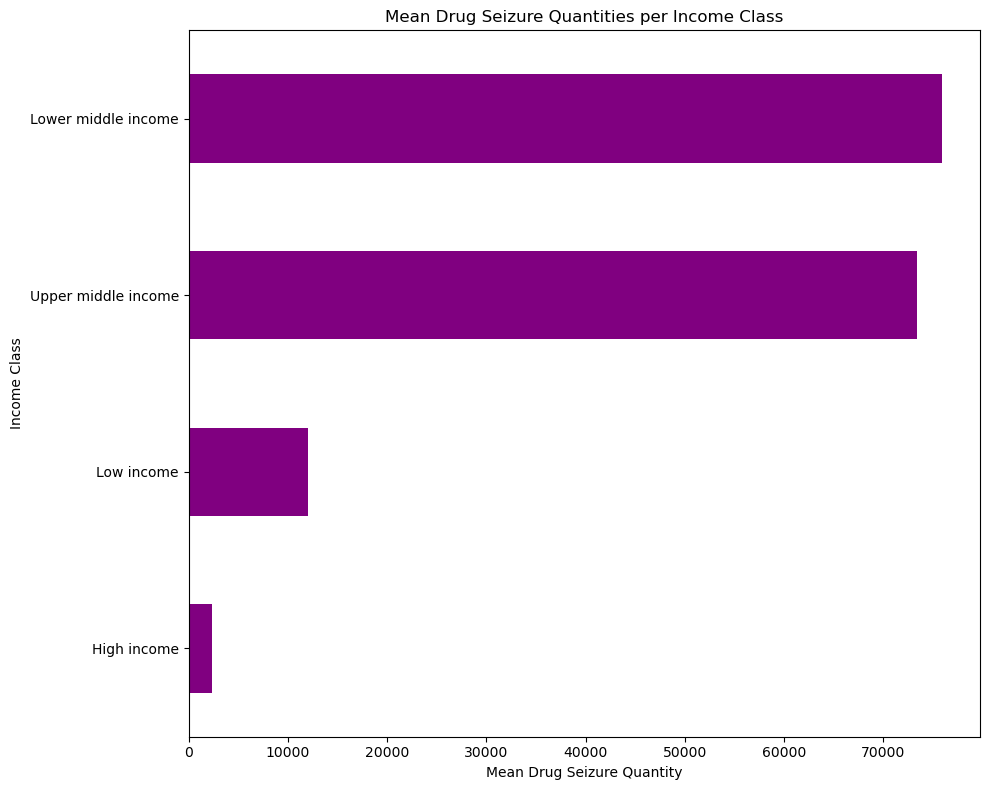

In [95]:
# created a horizontal bar chart for drug seizure quantities per income class
plt.figure(figsize=(10, 8))
drug_seizures_per_income.sort_values().plot(kind='barh', color='purple')
plt.xlabel('Mean Drug Seizure Quantity')
plt.ylabel('Income Class')
plt.title('Mean Drug Seizure Quantities per Income Class')
plt.tight_layout()
plt.show()


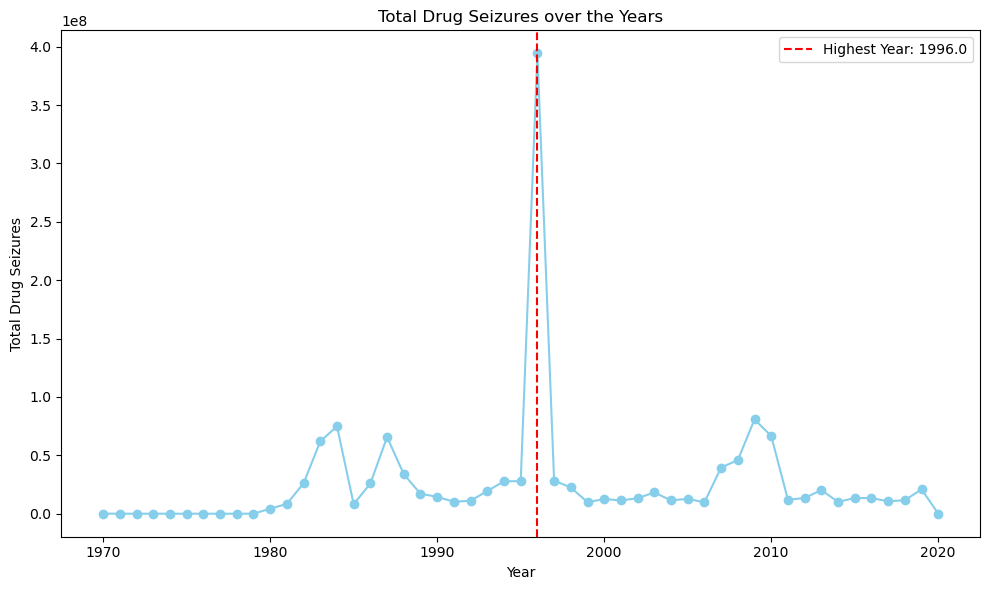

In [99]:
# Plotting a line chart to show total drug seizures over the years
plt.figure(figsize=(10, 6))
plt.plot(total_seizures_by_year.index, total_seizures_by_year.values, marker='o', linestyle='-', color='skyblue')
plt.xlabel('Year')
plt.ylabel('Total Drug Seizures')
plt.title('Total Drug Seizures over the Years')
plt.axvline(x=year_highest_seizures, color='red', linestyle='--', label=f'Highest Year: {year_highest_seizures}')
plt.legend()
plt.tight_layout()
plt.show()
